# k-Nearest Neighbors Classification and Regression + Kernel Regression
I base this code off of following: <br>
https://nickmccullum.com/python-machine-learning/k-nearest-neighbors-python/ <br>
https://www.dataquest.io/blog/k-nearest-neighbors-in-python/ <br>

We will be leveraging scikit learns KNeighbors package, documentation can be found here: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## 1. kNN Classification

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute

### Read in and Standardize Data

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We can now use sklearns standard scaler to standardize all the numeric data, we use drop on Species since it is categorical.  This returns a numpy array which we have to cast back as a pandas dataframe.

In [4]:
scaler = StandardScaler()
scaler.fit(iris.drop('Species', axis=1))
scaled_features = scaler.transform(iris.drop('Species', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=iris.drop('Species',axis=1).columns)

In [5]:
scaled_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


### Split our data into training and test sets 
To be rigoursly correct we should have first parsed out a ~20% section of data for a hold out test set **before** we standardized our data. 

In [6]:
x = scaled_data
y = iris['Species']

In [7]:
x_training, x_test, y_training, y_test = train_test_split(x,y, test_size=.5)

### Choose Optimal size for k

In [8]:
error_rates = []

In [9]:
for i in np.arange(1,50):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training, y_training)
    new_predictions = new_model.predict(x_test)
    error_rates.append(np.mean(new_predictions != y_test))

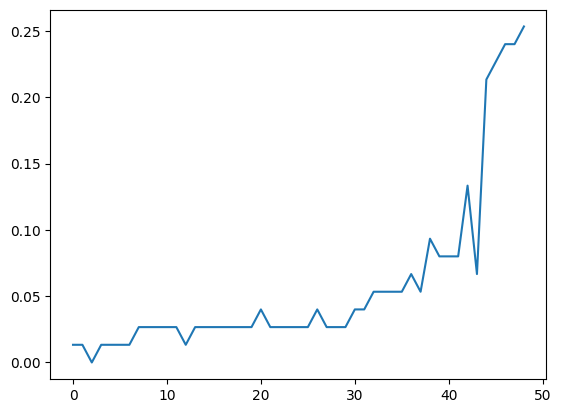

In [10]:
plt.plot(error_rates)

Seems like k=1 or 2 is best.

In [11]:
#k=1

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training, y_training)
predictions = model.predict(x_test)

In [12]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.96      0.98        28
 Iris-virginica       0.96      1.00      0.98        25

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75



In [13]:
cm = confusion_matrix(y_test,predictions)

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

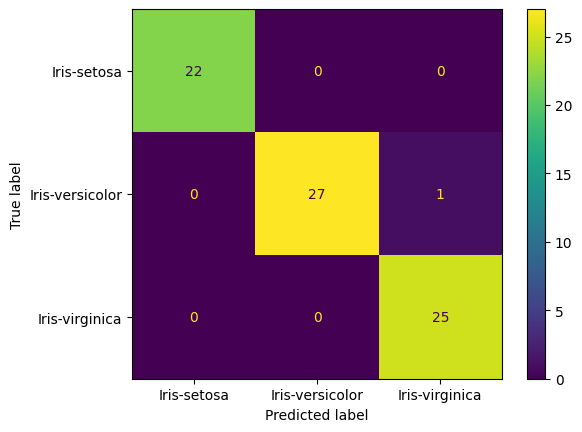

In [15]:
disp.plot()

In [16]:
#k=2

model = KNeighborsClassifier(n_neighbors = 2)
model.fit(x_training, y_training)
predictions = model.predict(x_test)

In [17]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.97      1.00      0.98        28
 Iris-virginica       1.00      0.96      0.98        25

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75



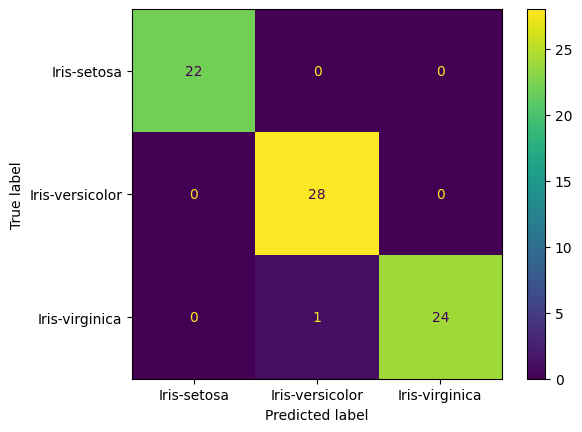

In [18]:
cm = confusion_matrix(y_test,predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

Let us see what happens if we had choosen a poor k, say k=45

In [19]:
#k=45

model = KNeighborsClassifier(n_neighbors = 45)
model.fit(x_training, y_training)
predictions = model.predict(x_test)

print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.93      0.46      0.62        28
 Iris-virginica       0.62      0.96      0.75        25

       accuracy                           0.79        75
      macro avg       0.85      0.81      0.79        75
   weighted avg       0.85      0.79      0.77        75



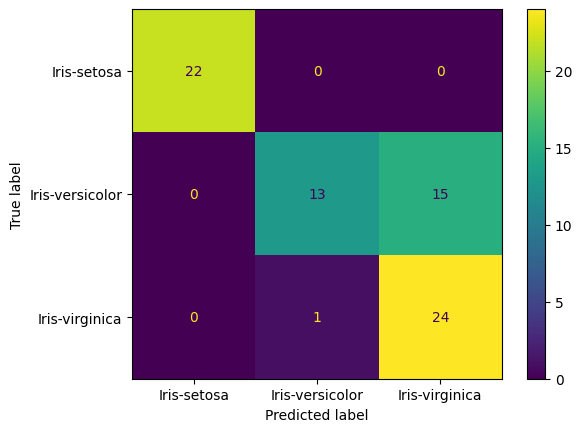

In [20]:
cm = confusion_matrix(y_test,predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

### kNN Classification Conclusion
Your choice of k definetly matters.  If you play around with the size of the test dataset you see it influances results as well.  The iris dataset is pretty small and as a result is somewhat fragile. <br>

How could we overcome this small size?  Instead of setting aside 20% of our training data to be a test set we could use all our data in a k-fold cross valdiation.

## 2. kNN Regression

### Import and standardize data
Here we want to create a regression model on y = sales, using the featyres TV, Radio and Newspaper which represent advertising costs in those mediums.

In [21]:
advertising = pd.read_csv("Advertising.csv", index_col=0)

In [22]:
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
scaler = StandardScaler()
scaler.fit(advertising)
scaled_features = scaler.transform(advertising)
scaled_data = pd.DataFrame(scaled_features, columns=advertising.columns)

In [24]:
scaled_data.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


### Split our data into training and test sets 

In [25]:
x = scaled_data[['TV', 'Radio', 'Newspaper']]
y = scaled_data['Sales']

x_training, x_test, y_training, y_test = train_test_split(x,y, test_size=.3)

### Choose Optimal size for k

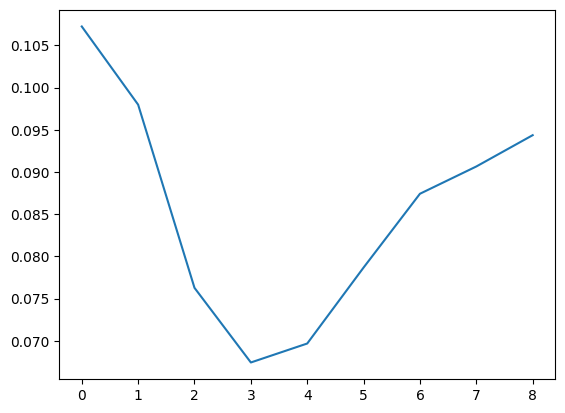

In [26]:
error_rates = []

for i in np.arange(1,10):
    new_model = KNeighborsRegressor(n_neighbors = i)
    new_model.fit(x_training, y_training)
    new_predictions = new_model.predict(x_test)
    mse=mean_squared_error(y_test,new_predictions)
    error_rates.append(mse)
    
plt.plot(error_rates)

In [27]:
#k=3
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_training, y_training)
predictions = new_model.predict(x_test)

In [28]:
mean_squared_error(y_test,predictions)

0.09436159232160721

In [29]:
r2_score(y_test,predictions)

0.9194840679839688

92% R^2 isn't a bad model at all.

## 3. KNN Regression using K-Fold Cross Validation 
Is there anything else we could have done? Maybe should have done?  We could "easily" use k-fold cross validation to split the training portion of our dataset into some k (*not to be confused with k from KNN*) and then calculated error rates for each fold and averaged.  This would have given us a more robust answer.

In [30]:
x = scaled_data[['TV', 'Radio', 'Newspaper']]
y = scaled_data['Sales']

len(x)

200

In [31]:
avg_mse = []
mse=[]

kf = KFold(n_splits=5, random_state=1, shuffle=True)

#define cross-validation method to use
kf.get_n_splits(x)  

5

In [32]:
def Average(lst):
    return sum(lst) / len(lst)

In [33]:
#Calculates the average MSE accross all folds for any given number of neighbors
for i, (train_index, test_index) in enumerate(kf.split(x)):
    new_model = KNeighborsRegressor(n_neighbors = 1)
    new_model.fit(x.loc[train_index], y.loc[train_index])
    new_predictions = new_model.predict(x.loc[test_index])
    error=mean_squared_error(y.loc[test_index],new_predictions)
    mse.append(error)
    
Average(mse)

0.08559853557648753

In [34]:
for j in np.arange(1,10):
    #Calculates the average MSE accross all folds for any given number of neighbors
    for i, (train_index, test_index) in enumerate(kf.split(x)):
        new_model = KNeighborsRegressor(n_neighbors = j)
        new_model.fit(x.loc[train_index], y.loc[train_index])
        new_predictions = new_model.predict(x.loc[test_index])
        error=mean_squared_error(y.loc[test_index],new_predictions)
        mse.append(error)
    avg = Average(mse)
    avg_mse.append(avg)
    mse=[]

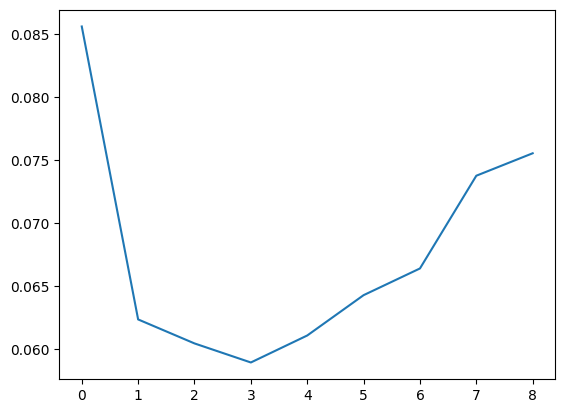

In [35]:
plt.plot(avg_mse)